# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*

 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'rm' and 'lstat` variables.

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Read in the data set
df = pd.read_csv('boston.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
# Clean and pre-process the data if neccessary

# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
print("Datatypes:\n", df.dtypes)

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
Datatypes:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


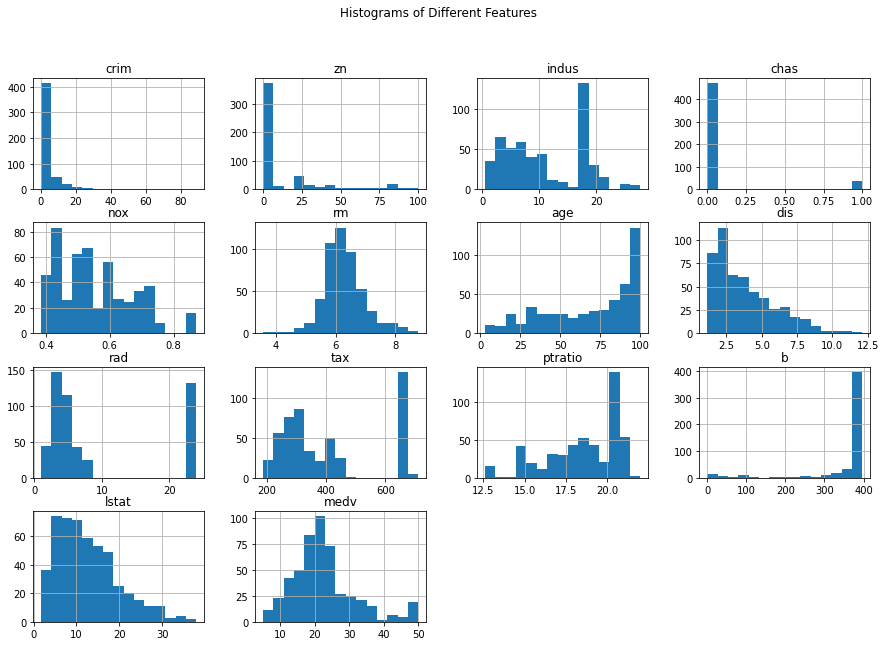

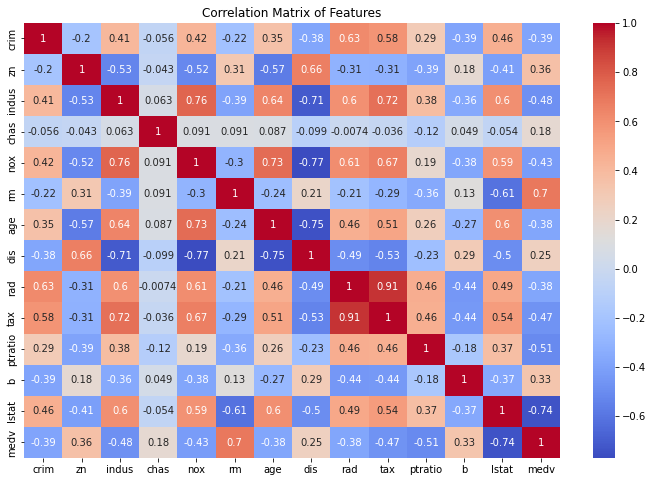

In [8]:
# Explore the data with visualisations such as histograms and correlation matrices
# Histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Different Features')
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()

# Visualizing the Correlation Matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Split the independent variables from the dependent variable 
X = df[['rm', 'lstat']]
y = df['medv']  # dependent variable series (Target)

Correlation coefficient between 'rm' and 'medv': 0.6953599470715393
Correlation coefficient between 'lstat' and 'medv': -0.7376627261740151


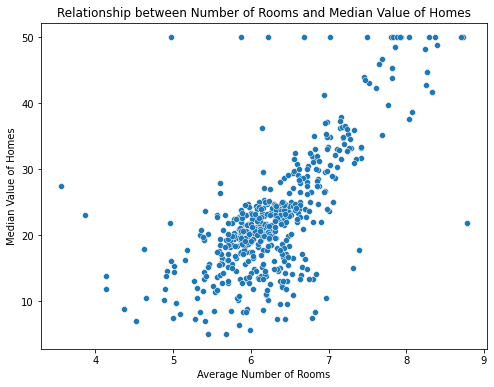

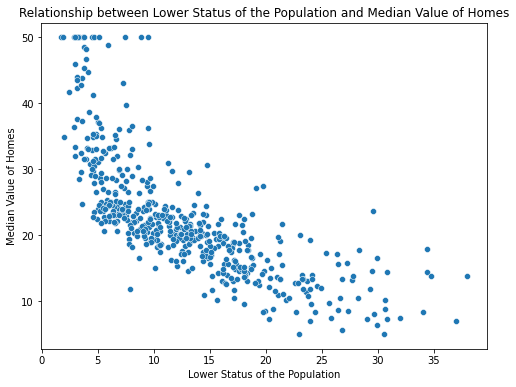

In [10]:
# Explore relationships between the independent and dependent variables

# Scatter plot for 'rm' (average number of rooms) vs 'medv' (median value of homes)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('Relationship between Number of Rooms and Median Value of Homes')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.show()

# Scatter plot for 'lstat' (lower status of the population) vs 'medv'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lstat', y='medv', data=df)
plt.title('Relationship between Lower Status of the Population and Median Value of Homes')
plt.xlabel('Lower Status of the Population')
plt.ylabel('Median Value of Homes')
plt.show()

# Calculating correlation coefficients
correlation_rm = df['rm'].corr(df['medv'])
correlation_lstat = df['lstat'].corr(df['medv'])

print("Correlation coefficient between 'rm' and 'medv':", correlation_rm)
print("Correlation coefficient between 'lstat' and 'medv':", correlation_lstat)

In [14]:
# Create a training and test set with a 75:25 split ratio

# Split the data into a training set and a test set with a 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the size of each set to verify
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 379
Test set size: 127


In [16]:
# Build a multiple linear regression model using 'rm' and 'lstat'
# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# After fitting the model, you can access its intercept and coefficients:
intercept = model.intercept_
coefficients = model.coef_

Model Intercept: -2.3205707325416185
Model Coefficients: [ 5.27320382 -0.64863772]


In [19]:
# Print the model intercept and coefficients
print("Model Intercept:", intercept)
print("Model Coefficients:", coefficients)

Model Intercept: -2.3205707325416185
Model Coefficients: [ 5.27320382 -0.64863772]


In [23]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print(y_pred[:10])

[25.64861998 31.02604952 17.50812413 26.08093021 19.6828203  23.02568254
 16.97562726 14.56510235 22.1782484  20.16605016]


In [27]:
# Evaluate the model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 29.545664673377924
R-squared: 0.5780826814921924


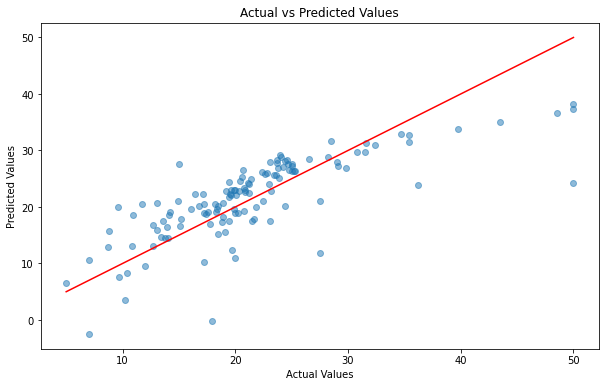

In [28]:
# Generate a plot

# y_test: Actual values
# y_pred: Predicted values by the model

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

In [30]:
# Print the coefficients
print("Intercept (Bias):", model.intercept_)
print("Coefficients:", model.coef_)

Intercept (Bias): -2.3205707325416185
Coefficients: [ 5.27320382 -0.64863772]


**Interpret coefficients in the context of the prediction:**
When both 'rm' (average number of rooms per dwelling) and 'lstat' (proportion of the population with lower status) are zero, the median value of homes would be approximately -2.32. However, this might not have a practical interpretation since it's not feasible for both 'rm' and 'lstat' to be zero in real-world scenarios.

The coefficient for 'rm' is 5.27320382, which suggests that for each additional room, the median value of homes increases by approximately 5.27 units (in the scale of your dependent variable, likely thousands of dollars).

The coefficient for 'lstat' is -0.64863772, indicating that an increase in the lower status of the population by one unit is associated with a decrease in the median value of homes by approximately 0.65 units.

**Summarise findings**
In summary, the model suggests that a higher average number of rooms per dwelling is positively associated with the median value of homes, while a higher proportion of the population with lower status is negatively associated with the median value of homes.